# Import the necessary libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2020
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2020
done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    -

## Connect to IBM Db2 to retreive the datasets of the coordinates

In [3]:
import ibm_db

#Replace the placeholder values with the actuals for your Db2 Service Credentials
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_hostname = "dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net"            # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_port = "50000"                    # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_uid = "zqr93964"                 # e.g. "abc12345"
dsn_pwd = "55zrdrptq024tb^b"                 # e.g. "7dBZ3wWt9XN6$o0J"656m8wxcrv^1hklw

#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  zqr93964 on host:  dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net


## Read the dataset into a pandas dataframe

In [12]:
import ibm_db_dbi

pconn=ibm_db_dbi.Connection(conn)
df=pd.read_sql('SELECT * FROM INDIALATLONG',pconn)

In [15]:
df.head()

,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,15.910429,79.747003
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [17]:
print('The data has {} states'.format(df.shape[0]))

The data has 36 states


In [18]:
print('The states are - ' + str(list(df['State'])))

The states are - ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


# Filled the necessary information to connect to a Foursquare API

In [19]:
CLIENT_ID = 'AEDYWQWJAEHJF2IA510X5QDXLF5FOW4JQY32JQXSXMZPDAVM' # your Foursquare ID
CLIENT_SECRET = 'V1FLBE0WDOBOGVTV33YBCYGVXXDHZBARPPFAPUFQSIMYHMJG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [20]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()

In [21]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [22]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


<H1> Get the required Catgories

In [37]:
business_category = []

req_categories = ['Food', 'Shop & Service', 'Travel & Transport']

for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [38]:
#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

<H1>Function to get the nearby business of all the State

In [39]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [40]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Andaman & Nicobar Islands
Corbyn's Cove Beach
Radha Nagar Beach
Rock Garden
Sector 36
Rose Garden
Tithal Beach
Daman
The Deltin
Jetty
Hotel Mirasol Resort & Water Park
Connaught Place | कनॉट प्लेस (Connaught Place)
Lodhi Gardens (लोधी बाग़) (Lodhi Gardens)
Sinquerium Beach
Japanese Garden
Candolim Beach
Hilltop
Thol Bird Sanctuary
DLF CyberHub
Kingdom Of Dreams
Leisure Valley
Downtown
PVR bluO
The Mall
Indian Institute Of Advanced Studies
Viceregal Lodge
Kufri
Dal Lake | डल झील | دل ليك
Nishat Bagh
Shalimar Bagh
Pari Mehal
Tangmarg
Tipu Sultan's Summer Palace
Dariya Daulat Bagh
Somanathapuram Temple
Mysore Palace
Sri Chamarajendra Zoological Gardens - Mysore Zoo
Mysore Zoo
Chamundi Hill
Thirumullavaram Beach
Kollam-Asramam ground
Neendakara Fishing Harbour
Varkala Beach
Black Beach
South Cliff Beach
Khardung La
Leh Palace
Alchi Monastery
Kala Talao
Palm Beach Road
Sanjay Gandhi National Park
Shillong Peak Point
Tripura Castle
Barapani Lake
Cloud 9
Mawsmai caves
Elephant Falls
Lake
Umia

In [41]:
print(nearby_business.shape)
nearby_business

(371, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
1,Andaman & Nicobar Islands,Veer Savarkar International Airport (IXZ),11.650245,92.732908,Airport
3,Andaman & Nicobar Islands,Rio Datsun,11.646032,92.730000,Auto Dealership
8,Sector 36,Cafe coffee day,30.733034,76.752648,Café
9,Sector 36,chocodate,30.734109,76.753291,Bakery
11,Sector 36,Mini market Second 37b,30.737438,76.754254,Miscellaneous Shop
13,Rose Garden,Park Plaza,30.744613,76.783930,Hotel
14,Rose Garden,Taj Hotel,30.745340,76.785161,Hotel
17,Tithal Beach,Sandip Bhajiya,20.597810,72.895031,Restaurant
18,Tithal Beach,Champaneri Street,20.597276,72.898752,Sporting Goods Shop
19,Tithal Beach,Salty Resort,20.602016,72.894988,Café


In [42]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,Airport,1
1,American Restaurant,5
2,Asian Restaurant,15
3,Auto Dealership,1
4,BBQ Joint,2
5,Bakery,11
6,Bistro,3
7,Bookstore,2
8,Breakfast Spot,1
9,Buffet,1


In [43]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 54 uniques categories.


<H1> Perform one-hot encoding of the business categories retrieved

In [44]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,Airport,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Café,Caribbean Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Music Store,Pharmacy,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Spa,Sporting Goods Shop,Tea Room,Tourist Information Center,Vegetarian / Vegan Restaurant
1,Andaman & Nicobar Islands,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andaman & Nicobar Islands,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Sector 36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Sector 36,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Sector 36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
nearby_business_onehot.shape

(371, 55)

Group rows by venues and by taking the mean of the frequency of occurrence of each category

In [46]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,Airport,American Restaurant,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Café,Caribbean Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Diner,Donut Shop,Dumpling Restaurant,Falafel Restaurant,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Music Store,Pharmacy,Pizza Place,Portuguese Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Spa,Sporting Goods Shop,Tea Room,Tourist Information Center,Vegetarian / Vegan Restaurant
0,Ana Sagar Lake,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,Andaman & Nicobar Islands,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,Barapani Lake,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,Bharathi Park,0.0,0.000000,0.000000,0.0,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.166667,0.111111,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.055556
4,Biju Pattnaik Park (Forest Park),0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5,Black Beach,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
6,Candolim Beach,0.0,0.058824,0.235294,0.0,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.058824,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,

In [47]:
nearby_business_grouped.shape

(59, 55)


Print each venue along with the top 5 most common business

In [48]:

num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Ana Sagar Lake----
                    venue  freq
0                   Hotel   1.0
1                 Airport   0.0
2             Music Store   0.0
3  Furniture / Home Store   0.0
4               Gastropub   0.0


----Andaman & Nicobar Islands----
             venue  freq
0          Airport   0.5
1  Auto Dealership   0.5
2         Pharmacy   0.0
3        Gastropub   0.0
4            Hotel   0.0


----Barapani Lake----
                    venue  freq
0       Indian Restaurant   1.0
1                 Airport   0.0
2             Music Store   0.0
3  Furniture / Home Store   0.0
4               Gastropub   0.0


----Bharathi Park----
               venue  freq
0        Coffee Shop  0.17
1              Hotel  0.17
2               Café  0.11
3  Indian Restaurant  0.11
4             Bakery  0.11


----Biju Pattnaik Park (Forest Park)----
                    venue  freq
0                Pharmacy   1.0
1             Music Store   0.0
2  Furniture / Home Store   0.0
3               Gastropub 

Put this into a pandas dataframe

In [49]:

#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [50]:
num_top_business = 12

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business,11th Most Common Business,12th Most Common Business
0,Ana Sagar Lake,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
1,Andaman & Nicobar Islands,Airport,Auto Dealership,Pharmacy,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
2,Barapani Lake,Indian Restaurant,Airport,Music Store,Furniture / Home Store,Gastropub,Hotel,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
3,Bharathi Park,Coffee Shop,Hotel,Café,Indian Restaurant,Bakery,Pizza Place,Italian Restaurant,Department Store,Vegetarian / Vegan Restaurant,French Restaurant,Sandwich Place,Tourist Information Center
4,Biju Pattnaik Park (Forest Park),Pharmacy,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


<H1>Perform Clustering
Find the optimal k value for clustering

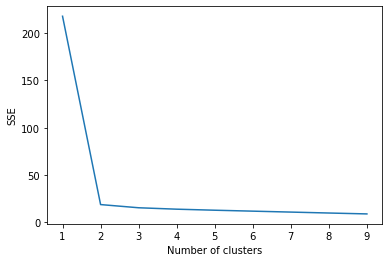

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Use the optimal k value obtained from the above graph

In [54]:
#Run k-means to cluster the neighborhood into 2 clusters

# set number of clusters
kclusters = 2

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [55]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business,11th Most Common Business,12th Most Common Business
1,Andaman & Nicobar Islands,11.649715,92.732334,0,Airport,Auto Dealership,Pharmacy,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
8,Sector 36,30.734333,76.753392,0,Bakery,Café,Miscellaneous Shop,Airport,Pharmacy,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant
13,Rose Garden,30.746004,76.781645,1,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
17,Tithal Beach,20.597626,72.895199,0,Sporting Goods Shop,Restaurant,Café,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant
21,Daman,20.421682,72.839065,0,Vegetarian / Vegan Restaurant,Restaurant,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant
25,The Deltin,20.412848,72.856197,0,Restaurant,Caribbean Restaurant,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant
31,Jetty,20.412949,72.832805,0,Diner,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
33,Hotel Mirasol Resort & Water Park,20.458962,72.854107,0,Indian Restaurant,Airport,Music Store,Furniture / Home Store,Gastropub,Hotel,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
36,Connaught Place | कनॉट प्लेस (Connaught Place),28.632731,77.220018,0,Indian Restaurant,Café,Food & Drink Shop,Molecular Gastronomy Restaurant,Portuguese Restaurant,Coffee Shop,Clothing Store,Food Truck,Bistro,Bakery,Asian Restaurant,Spa
61,Lodhi Gardens (लोधी बाग़) (Lodhi Gardens),28.591424,77.220899,1,Food Court,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


<H1> Visualize Clusters

In [63]:
import math

#visualize the resulting clusters
latitude = 20.5937
longitude = 78.9629
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
    
map_clusters    
    

<H1> Examine each cluster and determine the businesses that distinguish each cluster.

Cluster 1

In [65]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business,11th Most Common Business,12th Most Common Business
1,Andaman & Nicobar Islands,Airport,Auto Dealership,Pharmacy,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
8,Sector 36,Bakery,Café,Miscellaneous Shop,Airport,Pharmacy,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant
17,Tithal Beach,Sporting Goods Shop,Restaurant,Café,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant
21,Daman,Vegetarian / Vegan Restaurant,Restaurant,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant
25,The Deltin,Restaurant,Caribbean Restaurant,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant
31,Jetty,Diner,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
33,Hotel Mirasol Resort & Water Park,Indian Restaurant,Airport,Music Store,Furniture / Home Store,Gastropub,Hotel,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
36,Connaught Place | कनॉट प्लेस (Connaught Place),Indian Restaurant,Café,Food & Drink Shop,Molecular Gastronomy Restaurant,Portuguese Restaurant,Coffee Shop,Clothing Store,Food Truck,Bistro,Bakery,Asian Restaurant,Spa
63,Sinquerium Beach,Restaurant,Italian Restaurant,Hotel,Indian Restaurant,Spa,Seafood Restaurant,Portuguese Restaurant,Caribbean Restaurant,Airport,Molecular Gastronomy Restaurant,Gastropub,Juice Bar
86,Candolim Beach,Indian Restaurant,Asian Restaurant,Restaurant,American Restaurant,BBQ Joint,Italian Restaurant,Clothing Store,Seafood Restaurant,Airport,Miscellaneous Shop,Middle Eastern Restaurant,Juice Bar



Cluster 2

In [66]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business,11th Most Common Business,12th Most Common Business
13,Rose Garden,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
61,Lodhi Gardens (लोधी बाग़) (Lodhi Gardens),Food Court,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
257,Indian Institute Of Advanced Studies,Cosmetics Shop,Airport,Music Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
259,Viceregal Lodge,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
292,Mysore Palace,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
421,Puri Sea Beach,Hotel,Pizza Place,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant
427,Biju Pattnaik Park (Forest Park),Pharmacy,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
508,Ana Sagar Lake,Hotel,Airport,Music Store,Furniture / Home Store,Gastropub,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
636,Maidan,Food Truck,Music Store,Furniture / Home Store,Gastropub,Hotel,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop
